## Observations and Insights 

In [88]:
%matplotlib inline

In [89]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import sem
from scipy.stats import linregress
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study_df = pd.merge(mouse_metadata, study_results, how="outer", on="Mouse ID")
mouse_study_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [90]:
#

In [91]:
# Checking the number of mice in the DataFrame.
num_mice = len(mouse_study_df["Mouse ID"].value_counts())
num_mice

249

In [92]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate = mouse_study_df.groupby(["Mouse ID", "Timepoint"])["Mouse ID"].count()
duplicate_df = pd.DataFrame(duplicate)
duplicate_df


Mouse ID
Mouse ID Timepoint          
a203     0                 1
         5                 1
         10                1
         15                1
         20                1
...                      ...
z969     25                1
         30                1
         35                1
         40                1
         45                1

[1888 rows x 1 columns]

In [93]:
# Optional: Get all the data for the duplicate mouse ID. 


In [94]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_study_df = mouse_study_df.set_index(["Mouse ID"])
mouse_study_df
clean_mice_df =  mouse_study_df.drop(["g989"])
clean_mice_df

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
k403,Ramicane,Male,21,16,0,45.000000,0
k403,Ramicane,Male,21,16,5,38.825898,0
k403,Ramicane,Male,21,16,10,35.014271,1
k403,Ramicane,Male,21,16,15,34.223992,1
k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...
z969,Naftisol,Male,9,30,25,63.145652,2
z969,Naftisol,Male,9,30,30,65.841013,3
z969,Naftisol,Male,9,30,35,69.176246,4


In [95]:
clean_mice_df = clean_mice_df.reset_index()
clean_mice_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1875,z969,Naftisol,Male,9,30,25,63.145652,2
1876,z969,Naftisol,Male,9,30,30,65.841013,3
1877,z969,Naftisol,Male,9,30,35,69.176246,4
1878,z969,Naftisol,Male,9,30,40,70.314904,4


In [96]:
# Checking the number of mice in the clean DataFrame.
clean_num_mice = len(clean_mice_df["Mouse ID"].value_counts())
clean_num_mice

248

## Summary Statistics

In [97]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
drug_regimen = clean_mice_df.groupby("Drug Regimen")

mean = drug_regimen.mean()["Tumor Volume (mm3)"]
mean.name = "Mean"
median = drug_regimen.median()["Tumor Volume (mm3)"]
median.name = "Median"
variance = drug_regimen.var()["Tumor Volume (mm3)"]
variance.name = "Variance"
st_deviation = drug_regimen.std()["Tumor Volume (mm3)"]
st_deviation.name = "Standard deviation"
sem =  drug_regimen.sem()["Tumor Volume (mm3)"]
sem.name = "SEM"
# mice_summary_df = pd.DataFrame({"Mean":[mean], "Median":[median], "Variance":[variance], "Standard deviation":[st_deviation], "SEM":[sem]})
mice_summary_df = pd.DataFrame([mean, median, variance, st_deviation, sem]).T
mice_summary_df                          
# This method is the most straightforward, creating multiple series and putting them all together at the end.

,Mean,Median,Variance,Standard deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [98]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_df = clean_mice_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])
summary_df
# This method produces everything in a single groupby function.

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar Plots

In [99]:
clean_miceplot = clean_mice_df.groupby("Drug Regimen").count()["Mouse ID"]
clean_miceplot_df = pd.DataFrame(clean_miceplot)
clean_miceplot_df

,Mouse ID
Drug Regimen,
Capomulin,230
Ceftamin,178
Infubinol,178
Ketapril,188
Naftisol,186
Placebo,181
Propriva,148
Ramicane,228
Stelasyn,181


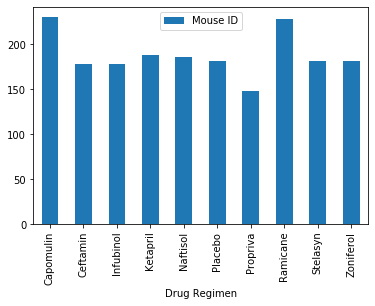

In [100]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas.

clean_miceplot_df.plot(kind="bar")
plt.show()

In [101]:
clean_micepyplot_df = clean_miceplot_df.reset_index()
clean_micepyplot_df

,Drug Regimen,Mouse ID
0,Capomulin,230
1,Ceftamin,178
2,Infubinol,178
3,Ketapril,188
4,Naftisol,186
5,Placebo,181
6,Propriva,148
7,Ramicane,228
8,Stelasyn,181
9,Zoniferol,182


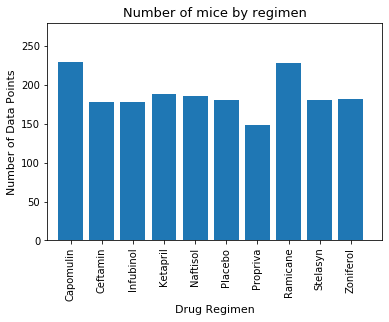

In [102]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.
x_axis = np.arange(len(clean_micepyplot_df))
tick_locations = [value for value in x_axis]
plt.bar(x_axis, clean_micepyplot_df["Mouse ID"], align="center")
plt.xticks(tick_locations, clean_micepyplot_df["Drug Regimen"], rotation="vertical")
plt.xlim(-0.75, len(x_axis))
plt.ylim(0, max(clean_micepyplot_df["Mouse ID"])+50)

# set the chart title and labels for x and y axis
plt.title('Number of mice by regimen', fontsize=13)
plt.xlabel('Drug Regimen', fontsize=11)
plt.ylabel('Number of Data Points', fontsize=11)

# Show the chart
plt.show()           

## Pie Plots

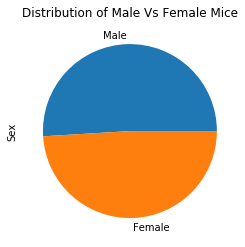

In [103]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
pie_plot_df = clean_mice_df["Sex"].value_counts()
pie_plot_df.plot.pie()

# Add title and show the chart
plt.title("Distribution of Male Vs Female Mice")
plt.show()

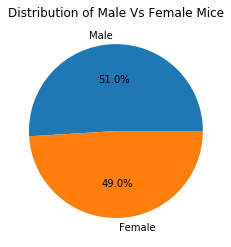

In [104]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = "Male", "Female"
plt.pie(pie_plot_df, labels=labels, autopct="%1.1f%%")

# Add title and show the chart
plt.title("Distribution of Male Vs Female Mice")
plt.show()

## Quartiles, Outliers and Boxplots

In [105]:
# Compute the maximum number of Timepoint days for each mouse
max_tumor_vol_df = clean_mice_df.drop_duplicates(subset=['Mouse ID'], keep = 'last')
max_tumor_vol_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
29,x401,Capomulin,Female,16,15,45,28.484033,0
39,m601,Capomulin,Male,22,17,45,28.430964,1
49,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
1846,z314,Stelasyn,Female,21,28,5,45.934712,0
1849,z435,Propriva,Female,12,26,10,48.710661,0
1859,z581,Infubinol,Female,24,25,45,62.754451,3
1869,z795,Naftisol,Female,13,29,45,65.741070,3


In [108]:
# Calculate the final tumor volume of each mouse across four (Capomulin, Ramicane, Infubinol, and Ceftamin)of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 
capomulin_treatment = max_tumor_vol_df.loc[(max_tumor_vol_df["Drug Regimen"]=="Capomulin"),["Mouse ID","Tumor Volume (mm3)"]]
capomulin_quartiles = capomulin_treatment["Tumor Volume (mm3)"].quantile([.25,.5,.75])
capomulin_lowerq = capomulin_quartiles[0.25]
capomulin_upperq = capomulin_quartiles[0.75]
capomulin_iqr = capomulin_upperq-capomulin_lowerq
print(f"The lower quartile of capomulin  is: {capomulin_lowerq}")
print(f"The upper quartile of capomulin is: {capomulin_upperq}")
print(f"The interquartile range of capomulin is: {capomulin_iqr}")
lower_bound = capomulin_lowerq - (1.5*capomulin_iqr)
upper_bound = capomulin_upperq + (1.5*capomulin_iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

outlier_capomulin = capomulin_treatment.loc[(capomulin_treatment["Tumor Volume (mm3)"] < lower_bound) | (capomulin_treatment["Tumor Volume (mm3)"] > upper_bound)]
outlier_capomulin


The lower quartile of capomulin  is: 32.37735684
The upper quartile of capomulin is: 40.1592203
The interquartile range of capomulin is: 7.781863460000004
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


In [124]:
capomulin_treatment.rename(columns = {"Tumor Volume (mm3)" : "Capomulin"}, inplace=True)
capomulin_treatment

,Mouse ID,Capomulin
19,s185,23.343598
29,x401,28.484033
39,m601,28.430964
64,f966,30.485985
104,u364,31.023923
124,y793,31.896238
134,r554,32.377357
144,m957,33.329098
164,t565,34.455298
204,i738,37.311846


In [110]:
ramicane_treatment = max_tumor_vol_df.loc[(max_tumor_vol_df["Drug Regimen"]=="Ramicane"), ["Mouse ID","Tumor Volume (mm3)"]]
ramicane_quartiles = ramicane_treatment["Tumor Volume (mm3)"].quantile([.25,.5,.75])
ramicane_lowerq = ramicane_quartiles[0.25]
ramicane_upperq = ramicane_quartiles[0.75]
ramicane_iqr = ramicane_upperq-ramicane_lowerq
print(f"The lower quartile of Ramicane  is: {ramicane_lowerq}")
print(f"The upper quartile of Ramicane is: {ramicane_upperq}")
print(f"The interquartile range of Ramicane is: {ramicane_iqr}")
lower_bound = ramicane_lowerq - (1.5*ramicane_iqr)
upper_bound = ramicane_upperq + (1.5*ramicane_iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

outlier_ramicane = ramicane_treatment.loc[(ramicane_treatment["Tumor Volume (mm3)"] < lower_bound) | (ramicane_treatment["Tumor Volume (mm3)"] > upper_bound)]
outlier_ramicane


The lower quartile of Ramicane  is: 31.56046955
The upper quartile of Ramicane is: 40.65900627
The interquartile range of Ramicane is: 9.098536719999998
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.


,Mouse ID,Tumor Volume (mm3)


In [123]:
ramicane_treatment.rename(columns = {"Tumor Volume (mm3)" : "Ramicane"}, inplace=True)
ramicane_treatment

,Mouse ID,Ramicane
9,k403,22.050126
49,g791,29.128472
59,s508,30.276232
74,m546,30.564625
84,z578,30.638696
94,j913,31.560470
114,n364,31.095335
154,c758,33.397653
174,a644,32.978522
184,i177,33.562402


In [121]:
infubinol_treatment =max_tumor_vol_df.loc[(max_tumor_vol_df["Drug Regimen"]=="Infubinol"), ["Mouse ID","Tumor Volume (mm3)"]]
infubinol_quartiles = infubinol_treatment["Tumor Volume (mm3)"].quantile([.25,.5,.75])
infubinol_lowerq = infubinol_quartiles[0.25]
infubinol_upperq = infubinol_quartiles[0.75]
infubinol_iqr = infubinol_upperq-infubinol_lowerq
print(f"The lower quartile of Infubinol  is: {infubinol_lowerq}")
print(f"The upper quartile of Infubinol is: {infubinol_upperq}")
print(f"The interquartile range of Infubinol is: {infubinol_iqr}")
lower_bound = infubinol_lowerq - (1.5*infubinol_iqr)
upper_bound = infubinol_upperq + (1.5*infubinol_iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

outlier_infubinol = infubinol_treatment.loc[(infubinol_treatment["Tumor Volume (mm3)"] < lower_bound) | (infubinol_treatment["Tumor Volume (mm3)"] > upper_bound)]
outlier_infubinol


The lower quartile of Infubinol  is: 54.04860769
The upper quartile of Infubinol is: 65.52574285
The interquartile range of Infubinol is: 11.477135160000003
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.


,Mouse ID,Tumor Volume (mm3)
669,c326,36.321346


In [122]:
infubinol_treatment.rename(columns = {"Tumor Volume (mm3)" : "Infubinol"}, inplace=True)
infubinol_treatment

,Mouse ID,Infubinol
463,a203,67.973419
473,a251,65.525743
530,a577,57.031862
540,a685,66.083066
637,c139,72.226731
669,c326,36.321346
742,c895,60.969711
800,e476,62.435404
834,f345,60.918767
936,i386,67.289621


In [119]:
ceftamin_treatment = max_tumor_vol_df.loc[(max_tumor_vol_df["Drug Regimen"]=="Ceftamin"), ["Mouse ID","Tumor Volume (mm3)"]]
ceftamin_quartiles = ceftamin_treatment["Tumor Volume (mm3)"].quantile([.25,.5,.75])
ceftamin_lowerq = ceftamin_quartiles[0.25]
ceftamin_upperq = ceftamin_quartiles[0.75]
ceftamin_iqr = ceftamin_upperq-ceftamin_lowerq
print(f"The lower quartile of Ceftamin  is: {ceftamin_lowerq}")
print(f"The upper quartile of Ceftamin is: {ceftamin_upperq}")
print(f"The interquartile range of Ceftamin is: {ceftamin_iqr}")
lower_bound = ceftamin_lowerq - (1.5*ceftamin_iqr)
upper_bound = ceftamin_upperq + (1.5*ceftamin_iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

outlier_ceftamin = ceftamin_treatment.loc[(ceftamin_treatment["Tumor Volume (mm3)"] < lower_bound) | (ceftamin_treatment["Tumor Volume (mm3)"] > upper_bound)]
outlier_ceftamin


The lower quartile of Ceftamin  is: 48.72207785
The upper quartile of Ceftamin is: 64.29983003
The interquartile range of Ceftamin is: 15.577752179999997
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


,Mouse ID,Tumor Volume (mm3)


In [120]:
ceftamin_treatment.rename(columns = {"Tumor Volume (mm3)" : "Ceftamin"}, inplace=True)
ceftamin_treatment

,Mouse ID,Ceftamin
493,a275,62.999356
594,b447,45.000000
600,b487,56.057749
617,b759,55.742829
840,f436,48.722078
927,h531,47.784682
980,j296,61.849023
1020,k210,68.923185
1099,l471,67.748662
1106,l490,57.918381


In [125]:
# Create a data frame to store the four regimens
boxplot_df = pd.DataFrame([capomulin_treatment["Capomulin"],ramicane_treatment["Ramicane"],infubinol_treatment["Infubinol"], ceftamin_treatment["Ceftamin"]]).T
boxplot_df

,Capomulin,Ramicane,Infubinol,Ceftamin
9,NaN,22.050126,NaN,NaN
19,23.343598,NaN,NaN,NaN
29,28.484033,NaN,NaN,NaN
39,28.430964,NaN,NaN,NaN
49,NaN,29.128472,NaN,NaN
...,...,...,...,...
1784,NaN,NaN,NaN,61.386660
1800,NaN,NaN,67.685569,NaN
1832,NaN,NaN,NaN,68.594745
1842,NaN,NaN,NaN,64.729837


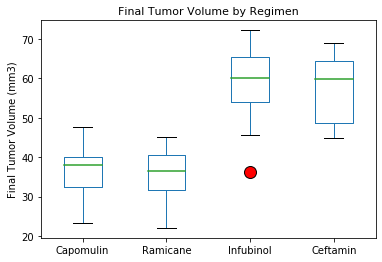

In [150]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

# plot. Set color of marker face and marker edge

flierprops = dict(marker='o', markerfacecolor='r', markersize=12,
                  linestyle='none', markeredgecolor='k')
box_plot = boxplot_df.boxplot(grid=False, column=['Capomulin','Ramicane', 'Infubinol', 'Ceftamin'], medianprops = medianprops, flierprops=flierprops)
box_plot.set_title('Final Tumor Volume by Regimen', fontsize=11)
box_plot.set_ylabel("Final Tumor Volume (mm3)")
plt.show()

## Line and Scatter Plots

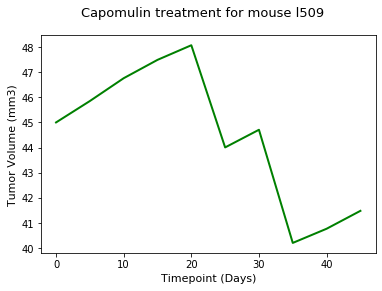

In [23]:
# Generate a line plot of time point versus tumor volume for a mouse s185 treated with Capomulin

# Slice the clean data so that it just has rows for Capomulin treatment for a mouse with ID s185
line_plot_df = clean_mice_df.loc[(clean_mice_df["Drug Regimen"]=="Capomulin") & (clean_mice_df["Mouse ID"]=="l509"),["Mouse ID","Timepoint", "Tumor Volume (mm3)"]]
mouse_treatment = plt.plot(line_plot_df["Timepoint"], line_plot_df["Tumor Volume (mm3)"], color="green", linewidth=2)

# get reference to the current figure
fig = plt.gcf()
fig.suptitle('Capomulin treatment for mouse l509', fontsize=13)

# set labels for x and y axis
plt.xlabel('Timepoint (Days)', fontsize=11)
plt.ylabel('Tumor Volume (mm3)', fontsize=11)
plt.show()

Text(0, 0.5, 'Average Tumor volume (mm3)')

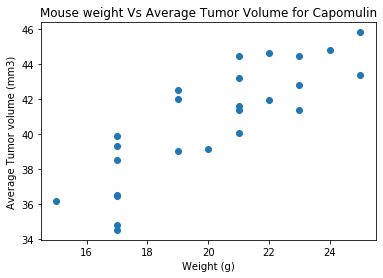

In [24]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
# Group by Drug Regimen and Mouse ID to compute mean of Tumor Volume
scatter_plot = clean_mice_df.groupby(["Drug Regimen","Mouse ID"])["Tumor Volume (mm3)"].mean()

# Create a data frame
scatter_plot_df = pd.DataFrame(scatter_plot)

# Add the weight column to the data frame
scatter_plot_df["Weight (g)"]=clean_mice_df.groupby(["Drug Regimen","Mouse ID"])["Weight (g)"].mean()

# Reset the index so we can use the columns in the plot
scatter_plot_df = scatter_plot_df.reset_index() 

# Slice the data to retain rows for only the Capomulin drug regimen
scatter_plot_final_df = scatter_plot_df.loc[scatter_plot_df["Drug Regimen"]=="Capomulin",["Tumor Volume (mm3)","Weight (g)"]]
x_value = scatter_plot_final_df["Weight (g)"]
y_value = scatter_plot_final_df["Tumor Volume (mm3)"]
plt.scatter(x_value, y_value, marker="o")

# Add the title and labels to the x and y axis
plt.title("Mouse weight Vs Average Tumor Volume for Capomulin")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor volume (mm3)")

## Correlation and Regression

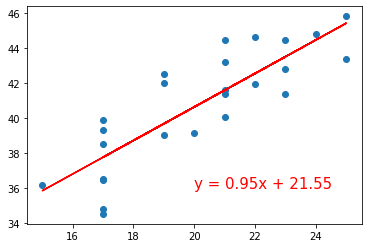

In [25]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
x_value = scatter_plot_final_df["Weight (g)"]
y_value = scatter_plot_final_df["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_values = x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_value,y_value)
plt.plot(x_value,regress_values,"r-")
plt.annotate(line_eq,(20,36),fontsize=15,color="red")
plt.show()

In [26]:
correlation = st.pearsonr(x_value,y_value)
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.show()

The correlation between both factors is 0.84
